In [6]:
import pandas as pd

url = 'creditcard.csv'
data = pd.read_csv(url)

print("Credit Card Fraud Detection data -  rows:",data.shape[0]," columns:", data.shape[1])
print(data.head())
print(data.info())
print(data.columns)

Credit Card Fraud Detection data -  rows: 284807  columns: 31
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.1

In [7]:
print(data.describe()) 

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [8]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

data.fillna(data.median(), inplace=True)

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print(data_scaled.describe())

               Time            V1            V2            V3            V4  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -3.065637e-16 -1.506872e-17 -9.580116e-18 -8.622104e-17 -5.189230e-18   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -1.996583e+00 -2.879855e+01 -4.403529e+01 -3.187173e+01 -4.013919e+00   
25%   -8.552120e-01 -4.698918e-01 -3.624707e-01 -5.872142e-01 -5.993788e-01   
50%   -2.131453e-01  9.245351e-03  3.965683e-02  1.186124e-01 -1.401724e-02   
75%    9.372174e-01  6.716939e-01  4.867202e-01  6.774569e-01  5.250082e-01   
max    1.642058e+00  1.253351e+00  1.335775e+01  6.187993e+00  1.191874e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   3.832046e-17  9.979288e-18  1.237432e-17 -3.193372e-18  7.234983e-19   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

mean_amount = data['Amount'].mean()
std_amount = data['Amount'].std()
data['z_score'] = (data['Amount'] - mean_amount) / std_amount

threshold_z = 3
data['anomaly_z'] = np.abs(data['z_score']) > threshold_z

anomalies_z = data[data['anomaly_z'] == True]
print("Anomalies found using Z-score:")
print(anomalies_z)


iso_forest = IsolationForest(contamination=0.01)
data['anomaly_if'] = iso_forest.fit_predict(data.drop(columns=['Class', 'anomaly_z', 'z_score']))

data['anomaly_if'] = data['anomaly_if'] == -1

anomalies_if = data[data['anomaly_if'] == True]
print("Anomalies found using Isolation Forest:")
print(anomalies_if)


kmeans = KMeans(n_clusters=2)
data['cluster'] = kmeans.fit_predict(data.drop(columns=['Class', 'anomaly_z', 'z_score', 'anomaly_if']))

data['distance'] = np.linalg.norm(data.drop(columns=['Class', 'anomaly_z', 'z_score', 'anomaly_if', 'cluster']).values - kmeans.cluster_centers_[data['cluster']], axis=1)
threshold_kmeans = data['distance'].quantile(0.95) 
data['anomaly_kmeans'] = data['distance'] > threshold_kmeans

anomalies_kmeans = data[data['anomaly_kmeans'] == True]
print("Anomalies found using K-means:")
print(anomalies_kmeans)

Anomalies found using Z-score:
            Time        V1         V2         V3        V4         V5  \
51          36.0 -1.004929  -0.985978  -0.038039  3.710061  -6.631951   
89          59.0 -0.773293  -4.146007  -0.932038  0.027094  -1.698307   
140         87.0 -5.101877   1.897022  -3.458034 -1.277543  -5.517758   
150         93.0 -1.640014  -0.479831   1.613630  2.997979  -3.803788   
164        103.0 -6.093248 -12.114213  -5.694973  3.294389  -1.413792   
...          ...       ...        ...        ...       ...        ...   
284249  172273.0 -9.030538 -11.112584 -16.233798  3.592021 -40.427726   
284290  172305.0  0.311762  -2.602832  -2.942923  1.880832  -0.090804   
284383  172397.0 -0.065120  -4.114668  -2.106854 -0.137339  -1.384530   
284497  172498.0 -0.801222  -4.874934  -3.195666  1.177224  -1.299393   
284528  172527.0  0.643223  -3.380753  -3.890511 -0.386292  -0.266371   

               V6         V7        V8        V9  ...       V23       V24  \
51       5.1221

Isolation Forest Performance Assessment:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.11      0.64      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.82      0.59     56962
weighted avg       1.00      0.99      0.99     56962



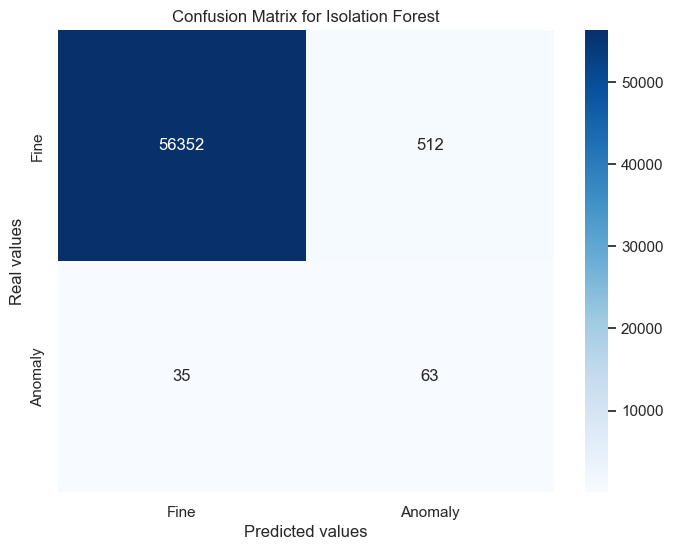

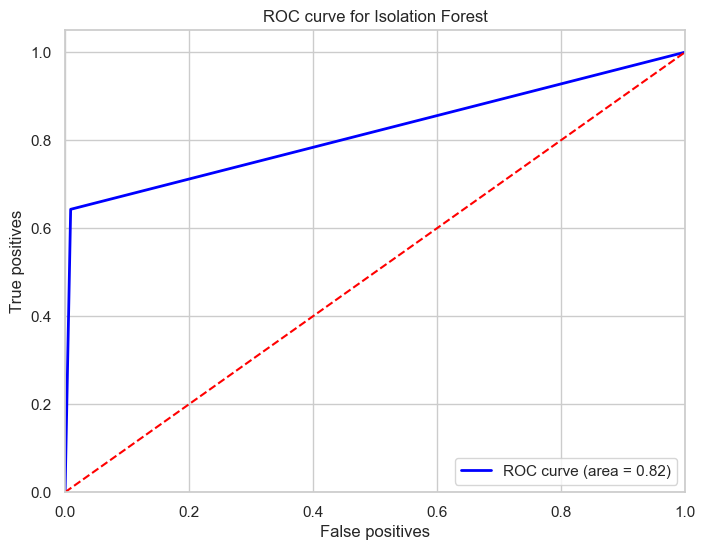

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

X = data.drop(columns=['Class', 'anomaly_z', 'z_score', 'anomaly_if', 'distance', 'anomaly_kmeans'])
y = data['Class']

X1, X2, y1, y2 = train_test_split(X, y, test_size=0.2, random_state=42)

iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X1)

y_pred_if = iso_forest.predict(X2)
y_pred_if = np.where(y_pred_if == -1, 1, 0) 

print("Isolation Forest Performance Assessment:")
print(classification_report(y2, y_pred_if))

cm_if = confusion_matrix(y2, y_pred_if)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_if, annot=True, fmt="d", cmap="Blues", xticklabels=["Fine", "Anomaly"], yticklabels=["Fine", "Anomaly"])
plt.title("Confusion Matrix for Isolation Forest")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.show()

fpr, tpr, thresholds = roc_curve(y2, y_pred_if)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positives')
plt.ylabel('True positives')
plt.title('ROC curve for Isolation Forest')
plt.legend(loc="lower right")
plt.show()

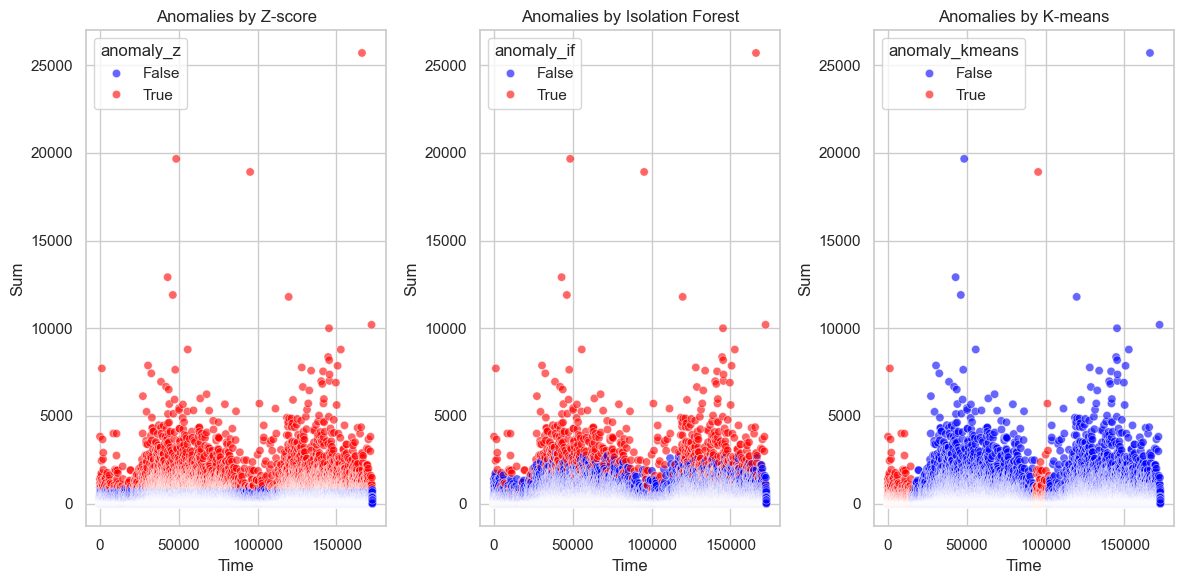

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Z-score
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='Time', y='Amount', hue='anomaly_z', palette={False: 'blue', True: 'red'}, alpha=0.6)
plt.title('Anomalies by Z-score')
plt.xlabel('Time')
plt.ylabel('Sum')

# Isolation Forest
plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='Time', y='Amount', hue='anomaly_if', palette={False: 'blue', True: 'red'}, alpha=0.6)
plt.title('Anomalies by Isolation Forest')
plt.xlabel('Time')
plt.ylabel('Sum')

# K-mean
plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='Time', y='Amount', hue='anomaly_kmeans', palette={False: 'blue', True: 'red'}, alpha=0.6)
plt.title('Anomalies by K-means')
plt.xlabel('Time')
plt.ylabel('Sum')

plt.tight_layout()
plt.show()


Метрика для метода Anomaly Z:
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99    284315
     Anomaly       0.00      0.02      0.00       492

    accuracy                           0.98    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      0.98      0.99    284807


Метрика для метода Anomaly If:
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99    284315
     Anomaly       0.09      0.52      0.15       492

    accuracy                           0.99    284807
   macro avg       0.54      0.75      0.57    284807
weighted avg       1.00      0.99      0.99    284807


Метрика для метода Anomaly Kmeans:
              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97    284315
     Anomaly       0.00      0.14      0.01       492

    accuracy                           0.95    284807
   macro avg       0.50      

/var/folders/hh/x40rf_2x0qb0zplkf5h66r_c0000gn/T/ipykernel_99095/3933671049.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Detected Anomalies', data=results_df, palette='viridis')


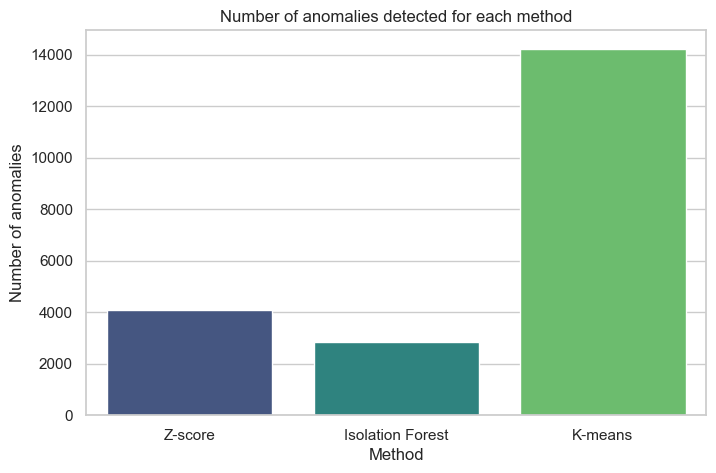

In [13]:
from sklearn.metrics import classification_report

results = {
    'Method': ['Z-score', 'Isolation Forest', 'K-means'],
    'Detected Anomalies': [
        data['anomaly_z'].sum(),
        data['anomaly_if'].sum(),
        data['anomaly_kmeans'].sum()
    ]
}

results_df = pd.DataFrame(results)

for method in ['anomaly_z', 'anomaly_if', 'anomaly_kmeans']:
    print(f"\nМетрика для метода {method.replace('_', ' ').title()}:")
    
    print(classification_report(data['Class'], data[method], target_names=['Normal', 'Anomaly']))
    
print("\nOverall results:")
print(results_df)

plt.figure(figsize=(8, 5))
sns.barplot(x='Method', y='Detected Anomalies', data=results_df, palette='viridis')
plt.title('Number of anomalies detected for each method')
plt.xlabel('Method')
plt.ylabel('Number of anomalies')
plt.show()